# Exploratory Data Analysis - Terrorism

# Author: Mame Thierno Diagne

Our purpose is to perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ 

# Import Libraries And Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Loading our dataset
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding="ISO-8859-1")

C:\Users\bossv\Documents\anacProjects\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
# Displays the 10 first rows of the dataset
df.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [3]:
# Display the dimension of dataset
df.shape

(181691, 135)

In [4]:
# Display the infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
# the differents columns of the dataset
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

# Data Cleaning & Manipulation

We Have 135 columns in the dataset. 
Firstly We are going to choose the necessary columns in the dataset and do it the analysis 

In [3]:
# Rename some colums to use in the new dataframe
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                  'region_txt':'Region','provstate':'State','city':'City','attacktype1_txt':'Attack_type',
                  'gname':'Group_name','targtype1_txt':'Target_type','targsubtype1_txt':'Target_Sub_type',
                  'weaptype1_txt':'Weap_type','weapsubtype1_txt':'Weap_Sub_type',
                  'motive':'Motive','weapdetail':'Weap_detail','nkill':'Number_kill'
    
},inplace=True)

In [4]:
# Now we're gonna take only the columns renamed which are required for analysis
df_r=df[['Year','Month','Day','Country','Region','State','City','Attack_type',
       'Target_type','Target_Sub_type','Group_name','Motive','Weap_type','Weap_Sub_type',
       'Weap_detail','Number_kill']]

In [8]:
# Let's display our new column
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country          181691 non-null  object 
 4   Region           181691 non-null  object 
 5   State            181270 non-null  object 
 6   City             181257 non-null  object 
 7   Attack_type      181691 non-null  object 
 8   Target_type      181691 non-null  object 
 9   Target_Sub_type  171318 non-null  object 
 10  Group_name       181691 non-null  object 
 11  Motive           50561 non-null   object 
 12  Weap_type        181691 non-null  object 
 13  Weap_Sub_type    160923 non-null  object 
 14  Weap_detail      114021 non-null  object 
 15  Number_kill      171378 non-null  float64
dtypes: float64(1), int64(3), object(12)
me

In [9]:
# Checking the missing value
df_r.isnull().sum()

Year                    0
Month                   0
Day                     0
Country                 0
Region                  0
State                 421
City                  434
Attack_type             0
Target_type             0
Target_Sub_type     10373
Group_name              0
Motive             131130
Weap_type               0
Weap_Sub_type       20768
Weap_detail         67670
Number_kill         10313
dtype: int64

We gonna fill our NaN value of each columns that have missing value using the imputation method

In [5]:
# Let's replace by imputing method
df_r['State'].fillna(df['State'].mode()[0],inplace=True)
df_r['City'].fillna(df_r['City'].mode()[0],inplace=True)
df_r['Motive'].fillna(df_r['Motive'].mode()[0],inplace=True)
df_r['Weap_Sub_type'].fillna(df_r['Weap_Sub_type'].mode()[0],inplace=True)
df_r['Target_Sub_type'].fillna(df_r['Target_Sub_type'].mode()[0],inplace=True)
df_r['Weap_detail'].fillna(df_r['Weap_detail'].mode()[0],inplace=True)
df_r['Number_kill'].fillna(df_r['Number_kill'].mean(),inplace=True)

C:\Users\bossv\Documents\anacProjects\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [11]:
# let's check again
df_r.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
State              0
City               0
Attack_type        0
Target_type        0
Target_Sub_type    0
Group_name         0
Motive             0
Weap_type          0
Weap_Sub_type      0
Weap_detail        0
Number_kill        0
dtype: int64

In [12]:
# Checking the duplicated value
df.duplicated().sum()

0

In [13]:
# Let's show the shape again
df_r.shape

(181691, 16)

# Exploratory Analysis Data

What are the top 10 years with more attacks?

In [14]:
df_r['Year'].value_counts().head(10)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64

Which are the 10 countries that have been most affected by the attacks?

In [15]:
df_r['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

 Which are the 10 Regions that have been most affected by the attacks?

In [16]:
df_r['Region'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

Which are the 10 states that have been most affected by the attacks?

In [17]:
df_r['State'].value_counts().head(10)

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

Which are the 10 cities that have been most affected by the attacks?

In [18]:
df_r['City'].value_counts().head(10)

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64

What are the most common types of attacks
top 10 choosing

In [19]:
df_r['Attack_type'].value_counts().head(10)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64

Which are the 10 group that have made more attacks

In [20]:
df_r['Group_name'].value_counts().head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group_name, dtype: int64

What are the 10 most targeted organizations?

In [21]:
df_r['Target_type'].value_counts().head(10)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: Target_type, dtype: int64

What are the 10 most targeted places or individuals

In [22]:
df_r['Target_Sub_type'].value_counts().head(10)

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Village/City/Town/Suburb                                    6542
Politician or Political Party Movement/Meeting/Rally        6306
Police Building (headquarters, station, school)             5907
Military Barracks/Base/Headquarters/Checkpost               5211
Police Patrol (including vehicles and convoys)              5105
Name: Target_Sub_type, dtype: int64

Let's display what motive claimed

In [23]:
df_r['Motive'].value_counts().head(10)

Unknown                                                                                                                                                                                                                                                 14889
The specific motive for the attack is unknown.                                                                                                                                                                                                          14430
The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015.                                                        297
The specific motive for the attack is unknown..                                                                                                                                                                                               

What types of weapons are used?

In [24]:
df_r['Weap_type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

What type of equipment or weopon is used

In [25]:
df_r['Weap_Sub_type'].value_counts()

Unknown Explosive Type                       44980
Unknown Gun Type                             33137
Automatic or Semi-Automatic Rifle            17412
Vehicle                                       9900
Projectile (rockets, mortars, RPGs, etc.)     9848
Other Explosive Type                          7304
Handgun                                       6704
Grenade                                       5167
Landmine                                      4251
Arson/Fire                                    4141
Suicide (carried bodily by human being)       3245
Remote Trigger                                2719
Knife or Other Sharp Object                   2585
Sticky Bomb                                   1594
Molotov Cocktail/Petrol Bomb                  1239
Dynamite/TNT                                  1222
Rifle/Shotgun (non-automatic)                 1175
Gasoline or Alcohol                            844
Time Fuse                                      792
Pipe Bomb                      

The number of deaths caused by attacks for the top 10 countries

In [27]:
df_r.groupby(['Country']).sum().sort_values('Number_kill',ascending=False).head(10)

,Year,Month,Day,Number_kill
Country,,,,
Iraq,49579386,160429,385382,78589.0
Afghanistan,25625202,84082,200828,39384.0
Pakistan,28880409,91548,222249,23822.0
Nigeria,7866102,24420,60867,22682.0
India,23994731,77011,186868,19341.0
Sri Lanka,6027946,20408,46721,15530.0
Syria,4429312,14217,34865,15229.0
Colombia,16561570,54278,125637,14698.0
Peru,12115735,39267,95373,12771.0


# Visualization

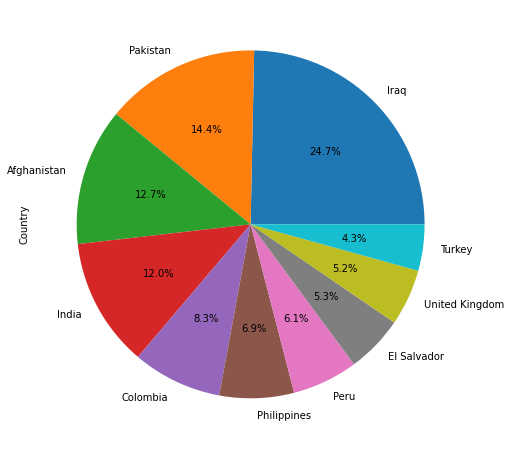

In [28]:
# The percemtage of attacks by 10 each countries
plt.figure(figsize=(14,8))
df_r['Country'].value_counts().head(10).plot.pie(autopct='%1.1f%%')
plt.show()

In [ ]:
# Show the density kde of the year

<AxesSubplot:ylabel='Density'>

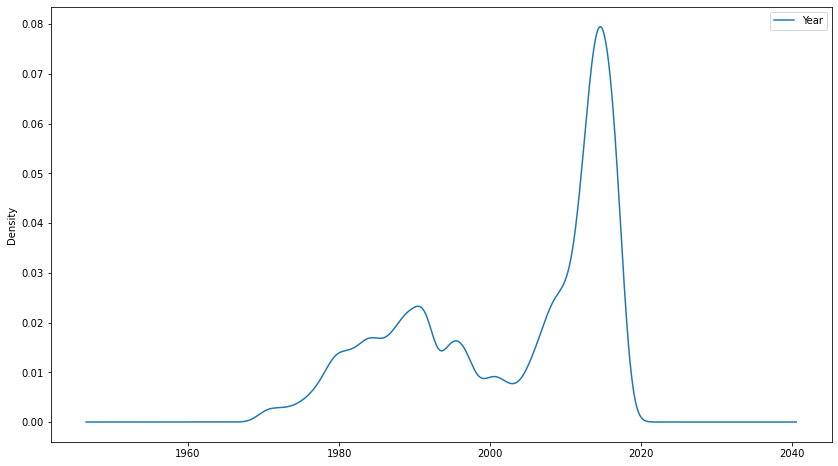

In [29]:
df_r[['Year']].plot(kind='kde',figsize=(14,8))

C:\Users\bossv\Documents\anacProjects\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total attacks')

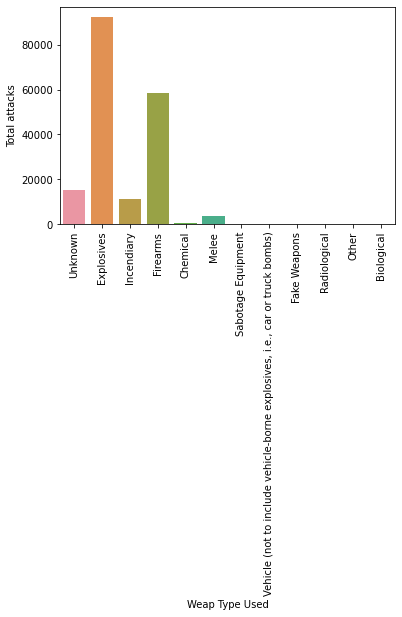

In [36]:
# Show the top 10 of type weapon used
sns.countplot(df_r['Weap_type'])
plt.xticks(rotation=90)
plt.xlabel('Weap Type Used')
plt.ylabel('Total attacks')

In [ ]:
# Show what are the 10 target types that have more deaths

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Private Citizens & Property'),
  Text(1, 0, 'Government (Diplomatic)'),
  Text(2, 0, 'Journalists & Media'),
  Text(3, 0, 'Government (Diplomatic)'),
  Text(4, 0, 'Government (Diplomatic)'),
  Text(5, 0, 'Police'),
  Text(6, 0, 'Police'),
  Text(7, 0, 'Utilities'),
  Text(8, 0, 'Military'),
  Text(9, 0, 'Government (General)')])

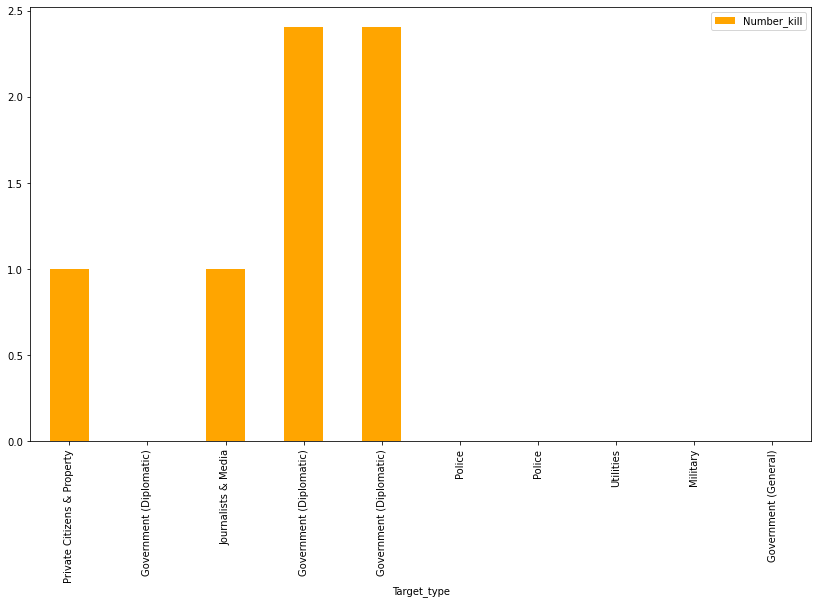

In [42]:
df_r.head(10).plot(kind='bar',x='Target_type',y='Number_kill',color='orange',figsize=(14,8))
plt.xticks(rotation=90)

Conclusion:
    According to the result of analyzes we see that the attacks are increased exponentially
    after the years when they experienced a huge increase in 2014 and gradually decreases.
    Irak dominates all countries and it has the highest number of attacks and then Pakistan, 
    Afganistan and India follow it.
    Most of the attacks were attacked through explosives and through fireamrs.
    The types of targets that recorded more kills are :Govemment(Diplomatic),journalists & media,Private
    citizens & Property.
    Groups that have committed more attacks are Tabitan,Islamic State of Iraq and the Levant (ISIL) and unidentified group